In [53]:
import pandas as pd
from glob import glob
import json

import datetime as dt
import nltk
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF

In [92]:
tweet_df = pd.DataFrame(columns = ['date', 'text', 'hashtags'])
for file in glob('data2/*.json'):
    with open(file) as f:
        file_data = json.load(f)
        df = pd.DataFrame(data=file_data)
        tweet_df = pd.concat([tweet_df, df], sort=False, ignore_index=True)

tweet_df['date'] = tweet_df['date'].apply(lambda x: pd.to_datetime(x))

In [93]:
tweet_df['text'] = tweet_df['text'].map(lambda x: re.sub(r'\bhttps\S*\b', '', x))
tweet_df['text'] = tweet_df['text'].map(lambda x: re.sub(r'\bpic\S*\b', '', x))
tweet_df = tweet_df.drop_duplicates(subset= ['text'])

In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
scores = []
for doc in tweet_df['text']:
    vs = analyzer.polarity_scores(doc)
    scores.append(vs)

In [78]:
scores_ = pd.DataFrame(scores)
scores_

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.925,0.075,0.0572
4,0.0,1.000,0.000,0.0000
...,...,...,...,...
77528,0.0,0.847,0.153,0.4019
77529,0.0,1.000,0.000,0.0000
77530,0.0,1.000,0.000,0.0000
77531,0.0,1.000,0.000,0.0000


In [94]:
tweet_df = tweet_df.reset_index().drop(columns='index')

In [95]:
tweet_df

,date,text,hashtags
0,2020-02-16 23:44:45,Even tho we trash I as an ambassador for #DubN...,[DubNation]
1,2020-02-16 23:38:56,@NBA @warriors @GMA @ESPNNBA my name travis ra...,"[NBA, DubNation, WarriorsGround, NBATwitter, W..."
2,2020-02-16 23:09:50,#dubnation,[dubnation]
3,2020-02-16 22:23:19,Contact me asap you won't be sorry \n#nba #la...,"[nba, lakernation, DubNation, TICKETMANIA, bay..."
4,2020-02-16 21:34:43,Marquese Chriss might have a big role on a rel...,"[Warriors, DubNation]"
...,...,...,...
77528,2019-11-28 16:11:46,Finally watched last night’s game and we defin...,"[Warriors, DubNation]"
77529,2019-11-28 16:09:35,BOM DIA #DubNation …,[DubNation]
77530,2019-11-28 16:07:59,Orgullo de ser #Dubnation,[Dubnation]
77531,2019-11-28 16:06:35,Depois de se aposentar @KlayThompson seria um ...,[DubNation]


In [96]:
sentiment_df = pd.concat([tweet_df, scores_], axis=1)

In [97]:
sentiment_df

,date,text,hashtags,neg,neu,pos,compound
0,2020-02-16 23:44:45,Even tho we trash I as an ambassador for #DubN...,[DubNation],0.0,1.000,0.000,0.0000
1,2020-02-16 23:38:56,@NBA @warriors @GMA @ESPNNBA my name travis ra...,"[NBA, DubNation, WarriorsGround, NBATwitter, W...",0.0,1.000,0.000,0.0000
2,2020-02-16 23:09:50,#dubnation,[dubnation],0.0,1.000,0.000,0.0000
3,2020-02-16 22:23:19,Contact me asap you won't be sorry \n#nba #la...,"[nba, lakernation, DubNation, TICKETMANIA, bay...",0.0,0.925,0.075,0.0572
4,2020-02-16 21:34:43,Marquese Chriss might have a big role on a rel...,"[Warriors, DubNation]",0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
77528,2019-11-28 16:11:46,Finally watched last night’s game and we defin...,"[Warriors, DubNation]",0.0,0.847,0.153,0.4019
77529,2019-11-28 16:09:35,BOM DIA #DubNation …,[DubNation],0.0,1.000,0.000,0.0000
77530,2019-11-28 16:07:59,Orgullo de ser #Dubnation,[Dubnation],0.0,1.000,0.000,0.0000
77531,2019-11-28 16:06:35,Depois de se aposentar @KlayThompson seria um ...,[DubNation],0.0,1.000,0.000,0.0000


# visualization

In [99]:
import matplotlib.pyplot as plt

In [107]:
sentiment_df.columns

Index(['date', 'text', 'hashtags', 'neg', 'neu', 'pos', 'compound'], dtype='object')

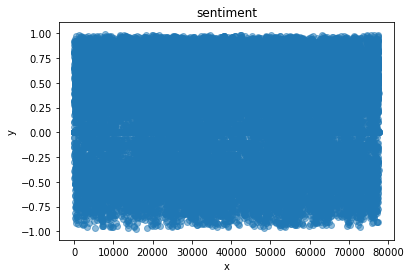

In [109]:
x = sentiment_df.index
y = sentiment_df['compound']

plt.scatter(x, y, alpha=0.5)
plt.title('sentiment')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [110]:
sentiment_df

,date,text,hashtags,neg,neu,pos,compound
0,2020-02-16 23:44:45,Even tho we trash I as an ambassador for #DubN...,[DubNation],0.0,1.000,0.000,0.0000
1,2020-02-16 23:38:56,@NBA @warriors @GMA @ESPNNBA my name travis ra...,"[NBA, DubNation, WarriorsGround, NBATwitter, W...",0.0,1.000,0.000,0.0000
2,2020-02-16 23:09:50,#dubnation,[dubnation],0.0,1.000,0.000,0.0000
3,2020-02-16 22:23:19,Contact me asap you won't be sorry \n#nba #la...,"[nba, lakernation, DubNation, TICKETMANIA, bay...",0.0,0.925,0.075,0.0572
4,2020-02-16 21:34:43,Marquese Chriss might have a big role on a rel...,"[Warriors, DubNation]",0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
77528,2019-11-28 16:11:46,Finally watched last night’s game and we defin...,"[Warriors, DubNation]",0.0,0.847,0.153,0.4019
77529,2019-11-28 16:09:35,BOM DIA #DubNation …,[DubNation],0.0,1.000,0.000,0.0000
77530,2019-11-28 16:07:59,Orgullo de ser #Dubnation,[Dubnation],0.0,1.000,0.000,0.0000
77531,2019-11-28 16:06:35,Depois de se aposentar @KlayThompson seria um ...,[DubNation],0.0,1.000,0.000,0.0000


In [49]:
octo = (tweet_df['date'] >= '2019-10-1') & (tweet_df['date'] <= '2019-10-31')
nov = (tweet_df['date'] >= '2019-11-1') & (tweet_df['date'] <= '2019-11-30')
dec = (tweet_df['date'] >= '2019-12-1') & (tweet_df['date'] <= '2019-12-31')
jan = (tweet_df['date'] >= '2020-1-1') & (tweet_df['date'] <= '2020-1-31')
feb = (tweet_df['date'] >= '2020-2-1') & (tweet_df['date'] <= '2020-2-25')

oct_df = tweet_df.loc[octo]
nov_df = tweet_df.loc[nov]
dec_df = tweet_df.loc[dec]
jan_df = tweet_df.loc[jan]
feb_df = tweet_df.loc[feb]

dfs_by_month = [oct_df, nov_df, dec_df, jan_df, feb_df]

In [50]:
def clean(df):
    df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
    df['text'] = df['text'].apply(lambda x: x.replace('RT', ' '))
    df['text'] = df['text'].map(lambda x: re.sub(r'\bhttps\S*\b', '', x))
    df['text'] = df['text'].map(lambda x: re.sub(r'\bpic\S*\b', '', x))
    df['text'] = df['text'].map(lambda x: re.sub(r'\b@\S*\b', '', x))
    df['text'] = df['text'].map(lambda x: re.sub(r'[^A-Za-z ]+', '', x))
    df['text'] = df['text'].map(lambda x: x.lower())
    unique_df = df.drop_duplicates(subset= ['text'])
    return unique_df

In [51]:
dfs_by_month = [clean(month_df) for month_df in dfs_by_month]
dfs_by_month

/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

[                     date                                               text  \
 18036 2019-10-07 23:58:52                                       very serious   
 18037 2019-10-07 23:58:31  stevekerr isnt afraid to speak up about his po...   
 18038 2019-10-07 23:58:15                                    cant be serious   
 18039 2019-10-07 23:57:59                                   where yo boys at   
 18040 2019-10-07 23:57:15                                        bay bidness   
 ...                   ...                                                ...   
 88087 2019-10-25 00:08:40  was gonna go get my nails done but its opening...   
 88088 2019-10-25 00:08:31  well in my ice cube voice today was a good day...   
 88090 2019-10-25 00:06:18  we dont have klay but i think we have good enu...   
 88091 2019-10-25 00:05:36  nba basketball live stream watch clippers at w...   
 88093 2019-10-25 00:04:20  i already know you finna be right by my side w...   
 
                          

In [ ]:
def preprocess(df):
    
    lemmatizer = WordNetLemmatizer()
    lemma_text = lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
    df['text'] = df['text'].apply(lemma_text)
    
    stop_words = set(nltk.corpus.stopwords.words('english'))

    stop_words = stop_words.union(set(['en', 'que', 'para', 'por', 'le', 'de', 'con', 'wa', 'ha', 'im', 'da', 'na'
                                       'un', 'se', 'el', 'su', 'una', 'del', 'al', 'lo', 'la', 
                                       'los', 'th', 'ahora', 'menos']))
    
    cv = CountVectorizer(stop_words=stop_words, ngram_range=(2,3), min_df = 5, max_df = 0.85)
    vectorized = cv.fit_transform(df['text'])
    
    
    
    
    